<a href="https://colab.research.google.com/github/laway/tensorflow/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensor Flow

There are many definitions for a regression problem but in our case we're going to simplify it: prediction a numerical variable based on some other combination of variables, even shorteer: predicting a number

In [1]:
import tensorflow as tf
print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.14.0


## Creating some data to view and fit

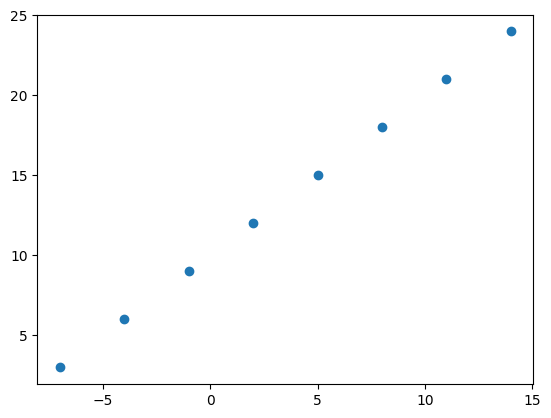

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [5]:
X[0].ndim

0

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn our NumPy array into tensors with type float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

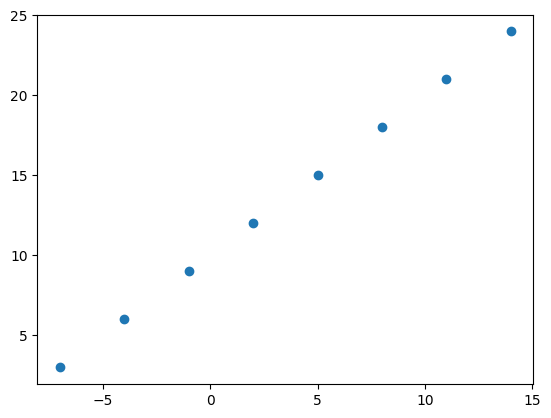

In [9]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1.   **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2.   **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [10]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradial descent
              metrics = ["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 10.1045 - mae: 10.1045
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 9.9720 - mae: 9.9720
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 9.8395 - mae: 9.8395
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 9.7070 - mae: 9.7070
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 9.5745 - mae: 9.5745


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 246ms/step


array([[19.517256]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation functions of each layer.
2. **Compiling a model** - here we might change the optimization function or, perhaps, the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on mode data (give the model more examples to learn from)

In [13]:
# let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting a model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 343ms/step - loss: 11.6373 - mae: 11.6373
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5048 - mae: 11.5048
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.3723 - mae: 11.3723
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8423 - mae: 10.8423
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7098 - mae: 10.7098
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5773 - mae: 10.5773
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4448 - mae: 10.4448
Epoch 11/100
1/1 [==============================] -

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[30.112406]], dtype=float32)

In [16]:
# recreating once again (with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9202 - mae: 13.9202
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2956 - mae: 13.2956
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6666 - mae: 12.6666
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0321 - mae: 12.0321
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3895 - mae: 11.3895
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7353 - mae: 10.7353
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0665 - mae: 10.0665
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3796 - mae: 9.3796
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6711 - mae: 8.6711
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9380 - mae: 7.9380
Epoch 11/100
1/1 [==============================] - 0s 10ms

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 78ms/step


array([[26.715517]], dtype=float32)

## Evaluating a model

In practice a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation there are 3 workds you should memorize:

> "Visualize, visualize, visualize"

It is a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of the model line up against the ground truth?

In [18]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the bigger dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

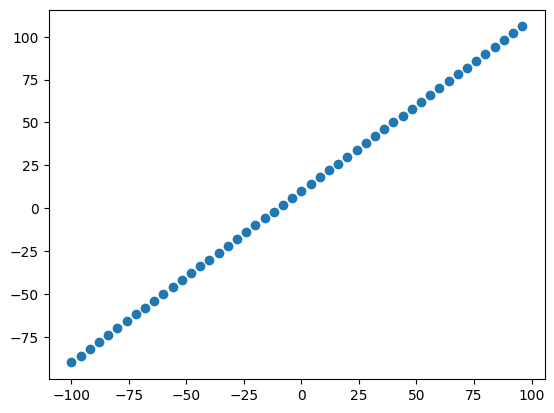

In [20]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this model, typicall 70-80% of the total data have available.
* **Validation set** - the model gets tuned using this set, which is typicall 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned. This set is typically 10-15% of the total data available



In [21]:
# Check the length of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40] #first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10  are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and t est sets... Let's visualize it again!

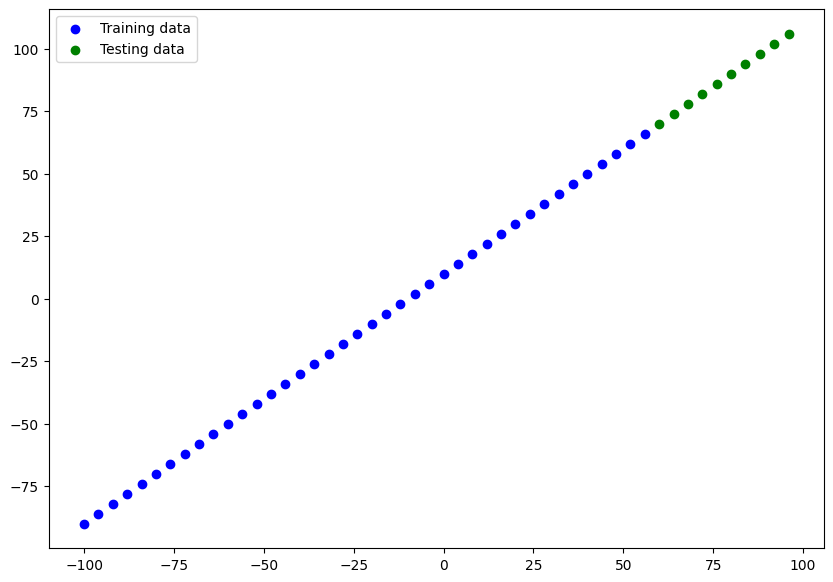

In [23]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Testing data")
#show a legend
plt.legend()

In [136]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

### Visualizing the model

In [143]:
# Let's create a model which builds automaticall by definining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model01_2")

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.summary()



Model: "model01_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters are not updated during training. This is typical when you bring in already learned patterns or parameters from other models during transfer learning

**Resource:** For a mode in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video: http://introtodeeplearning.com

In [149]:
# Fit the mode
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [138]:
# Get a summary of our model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


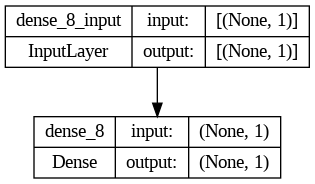

In [139]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions)

In [159]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 19ms/step


array([[ 78.845406],
       [ 83.88184 ],
       [ 88.91827 ],
       [ 93.954704],
       [ 98.991135],
       [104.027565],
       [109.063995],
       [114.100426],
       [119.13685 ],
       [124.17329 ]], dtype=float32)

In [118]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to re-use some kind of functionality in the future it is a good idea to turn it into a function

In [109]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to the ground truth labels
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, y_pred, c = "r", label = "Predictions")
  # Show the legend
  plt.legend()

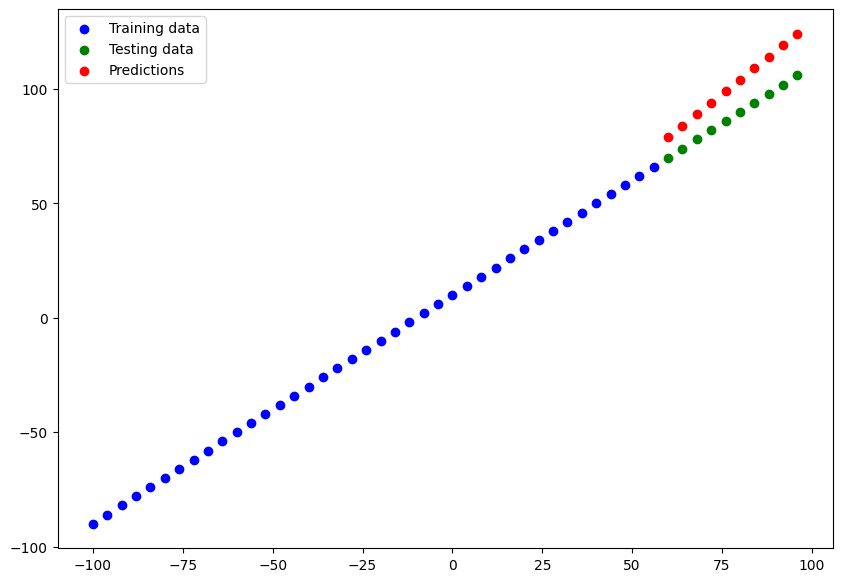

In [160]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the avarage errors"

In [161]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 33ms/step - loss: 13.5093 - mae: 13.5093


[13.509347915649414, 13.509347915649414]

In [162]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.509348>

In [163]:
# Calculate the mean square error
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=191.36453>

In [164]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = y_pred)

In [167]:
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = y_pred)

In [168]:
mae(y_test, tf.squeeze(y_pred)), mse(y_test, tf.squeeze(y_pred))

(<tf.Tensor: shape=(), dtype=float32, numpy=13.509348>,
 <tf.Tensor: shape=(), dtype=float32, numpy=191.36453>)